In [1]:
import numpy as np
from scipy.sparse.linalg import svds


In [2]:
sales_3d_array = np.load('sales_3d_array.npy')


In [3]:
sales_3d_array.shape

(76106, 73, 176)

In [4]:
num_articles, num_yearweeks, num_regions = sales_3d_array.shape
sales_matrix = sales_3d_array.reshape(-1, sales_3d_array.shape[-1])

In [5]:
sales_matrix.shape

(5555738, 176)

In [6]:
if np.any(np.isinf(sales_matrix)) or np.any(np.isnan(sales_matrix)):
    sales_matrix[np.isinf(sales_matrix) | np.isnan(sales_matrix)] = 0


In [7]:
k  = 2
U, sigma, Vt = svds(sales_matrix, k=k)

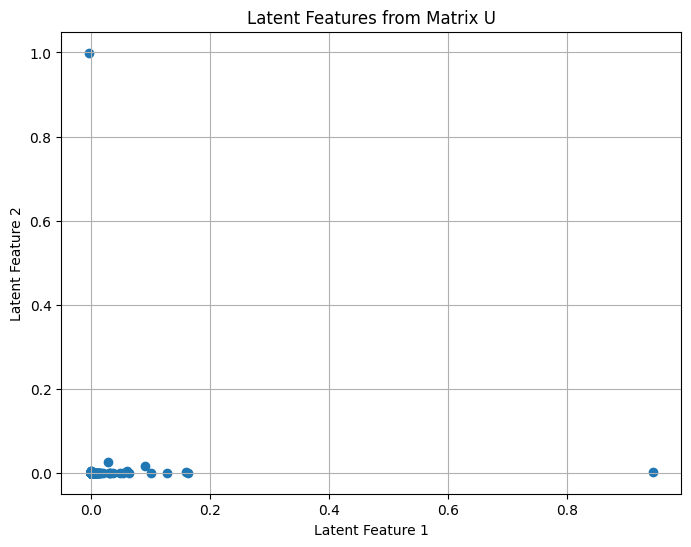

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(U[:, 0], U[:, 1])
plt.title('Latent Features from Matrix U')
plt.xlabel('Latent Feature 1')
plt.ylabel('Latent Feature 2')
plt.grid(True)
plt.show()

RECONSTRUCTION


In [9]:
reconstructed_matrix = np.dot(U, np.dot(np.diag(sigma), Vt))

In [10]:
reconstructed_matrix.shape

(5555738, 176)

In [11]:
import pandas as pd

In [12]:
# df = pd.DataFrame(reconstructed_matrix)


# csv_filename = 'reconstructed_data.csv'


# df.to_csv(csv_filename, index=False)

In [13]:
# reconstructed_3d_array = reconstructed_matrix.reshape((num_articles, num_yearweeks, num_regions))


In [14]:
# reconstructed_3d_array.shape

In [15]:
# mae = np.mean(np.abs(reconstructed_3d_array - sales_3d_array))

In [16]:
# differences = np.abs(reconstructed_3d_array - sales_3d_array)

In [17]:
# np.max(differences)

In [18]:
df_reconstructed = pd.read_csv('reconstructed_data.csv')
df_original = pd.read_csv('merged_data.csv')

In [19]:
df_reconstructed.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '166', '167', '168', '169', '170', '171', '172', '173', '174', '175'],
      dtype='object', length=176)

In [20]:
# diff = df_reconstructed[column].ne(df_original[column])